## Normal Distribution

This is a collection of my research on the normal distirbution, its history, its uses and explation of how it works.
By: David Burke

In [56]:
# Numerical arrays.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

# Math module
import math

### Introduction

The normal distibution is used to model real world random variables, using a continuous probability distribution. This distribution is symmetrical and has the shape of a bell curve, where the probability peaks at the center and the tails run to infinity either side, while never fully reaching 0. The key features of this bell curve are described by two parameters, the mean $\mu$ and the standard deviation $\sigma$. The mean describes the center line of the probability distribution, the mean of all possible outcomes. The stnadard deviation describes the spead of the possible outcomes, this describes the percision.

One of the key features of the normal distribution is that the probability of a given event occurring is equal to the area under the curve. In other words, the total probability of all possible outcomes is equal to 1.

Using the Central Limit Theorem, the normal distribution can be used as an increadibly powerful tool, using small samples to describe a nomral distribution for the total population. Ref: 1

#### Mathematical description

The normal distribution can be described using the following mathematical formula: Ref: 2

$
\begin{align}
f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^{2}}
\end{align}
$

$\sigma$ = Standard Deviation

$\mu$ = Mean

#### Standard Normal Distribution

Looking at the simplest form of a Normal Distribution, known as the Standard normal distribution. We will set the Mean = 0 so the bell is centered on Zero. Standard Deviation will = 1, so the variance is a unit measurement to make things simple.

The above mathematical equation can be updated with these number:

$
\begin{align}
f(x) = \frac{1}{(1)\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-(0)}{(1)})^{2}}
\end{align}
$

Becomes:

$
\begin{align}
f(x) = \frac{e^{-\frac{x^{2}}{2}}}{\sqrt{2\pi}}
\end{align}
$

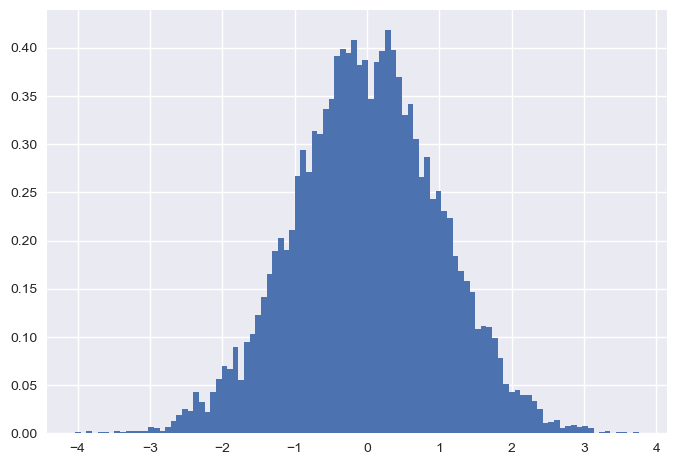

In [57]:
#setting theme for all graphs to follow
plt.style.use('seaborn')

# Range of normal x values.
x = np.random.normal(0.0, 1.0, 10000)

# plotting on a histogram
plt.hist(x, bins=100, density = True)

plt.show()

This above plot describes a random variable where the mean of all possible outcomes is zero, show by the bell curve being centered on Zero. The Variance or Standard Deviation or this plot is 1, this is much less intuitive to read from the plot so i will confirm this by working backwards.

#### Calculating Variance

To calculate the variance we would first need to normalise the dataset. This is done by calulating the mean, and if the mean is not equal to Zero, then subtracting the mean from all values. This has the affect of creating a new data set with a Mean equal to Zero. In the above Standard Normal Distribution plot, this is not an issue as the Mean has been set to Zero from the start.

The variance is a metric for how far data points can be expected from the mean value. Thinking about this, we are only concerned about the distance from mean, irrespective if it is going in the negative direction or the possitive direction. To account for this we can take the absolute value of all data points. This method is usefull, but as this is an arbitrary measure of the spread, it is equally correct to square all the values to get positive values only. This has the effect of increasing outlires at a greater rate than number close to the mean, and for numbers $ -1 > x < 1 $ this will have the effect of pulling them closer to the center. The squaring method is more commonly used so that is what I will follow through with here.

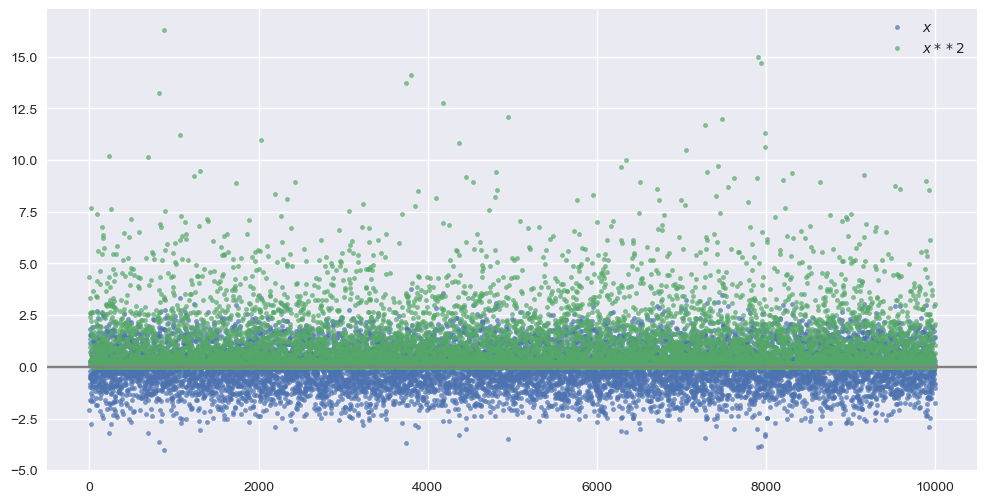

In [58]:
# Absolute values of x.
distanceFromMean = np.square(x)

# Create a plot.
fig, ax = plt.subplots(figsize=(12, 6))

# Plot of data points as they are
ax.plot(range(len(x)), x, label=r'$x$', alpha=.7, marker='.', linestyle='none')

# Plot of data points distance from Mean
ax.plot(range(len(distanceFromMean)), distanceFromMean, label=r'$x**2$', alpha=.7, marker='.', linestyle='none')

# Plot the y=0 line.
ax.axhline(y=0.0, color='grey', linestyle='-');

# Absolute legend.
plt.legend();


Now if we find the mean value of the green points above, we can calculate the mean distance from the zero line (The mean of the origional data)

Variance =1.0064719551797676


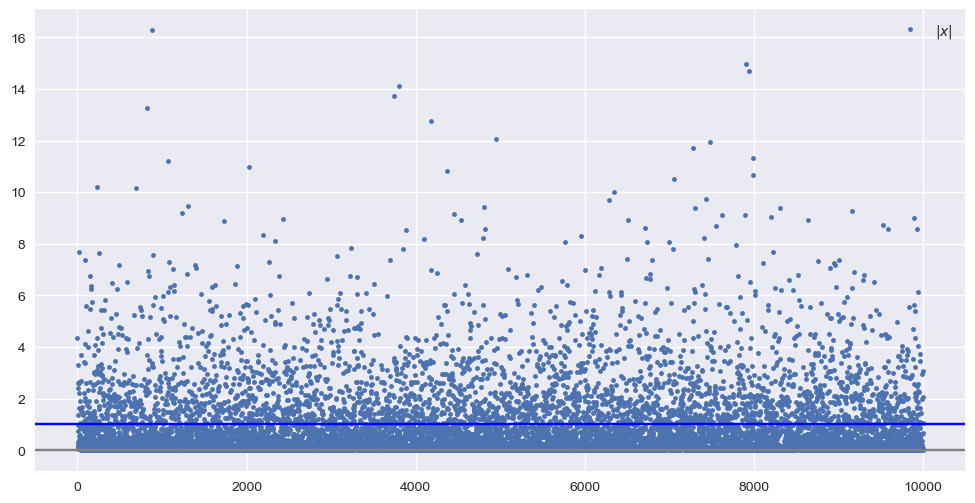

In [59]:
# Mean from the zero line
variance = np.sqrt(np.mean(distanceFromMean))
print('Variance ={}'.format(variance))

# Create a plot.
fig, ax = plt.subplots(figsize=(12, 6))

# Plot of data points distance from Mean
ax.plot(range(len(distanceFromMean)), distanceFromMean, label=r'$|x|$', marker='.', linestyle='none')

# Plot the y=0 line.
ax.axhline(y=0.0, color='grey', linestyle='-');

# Plot the y=0 line.
ax.axhline(y=variance, color='b', linestyle='-');

# Absolute legend.
plt.legend();

We can see from the variance calculated above the half of the squared values occour 1 unit from the mean. When we get the square root of this the change is minimal. This confirms the Standard deviation is 1, which is the same as this was set above.

Drawing this back onto the Strandard Normal Distribution:

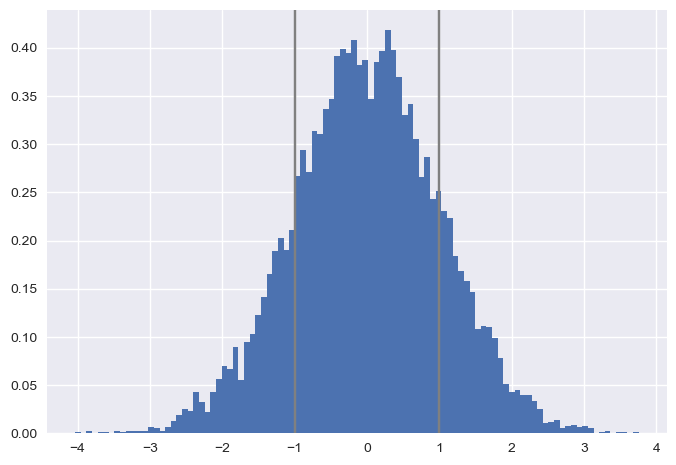

In [64]:
# plotting on a histogram
plt.hist(x, bins=100, density = True)

# Plot the y=0 line.
plt.axvline(x=1.0, color='grey', linestyle='-');

# Plot the y=0 line.
plt.axvline(x=-1.0, color='grey', linestyle='-');

plt.show()

#### Calculating what percentage of data lies within 1 Standard Deviation

To do this we will count all the values that lie between $ -1 > x < 1 $ and then divide this by the total number of data points, to get a percentage.

In [76]:
standardDeviation = []

# tallying up all values within 1 standard deviation
for i in x:
    if i > -1 and i < 1:
        standardDeviation.append(i)
        
percentage = (len(standardDeviation)/len(x))*100

print('Percent of data that lies between -1 and 1 is: {}%'.format(percentage))

Percent of data that lies between -1 and 1 is: 68.16%


Due to the relativly small sample size here there is some in built error, but this value is very close to the known percentage  within 1 Standard Deviation, which is: 68.27%

References:

Reference 1: Cetral Limit Theorem: https://en.wikipedia.org/wiki/Central_limit_theorem

Reference 2: Normal distribution: https://en.wikipedia.org/wiki/Normal_distribution